# Veces que se planta la bomba en cada punto por mapa

Bibliotecas necesarias para la ejecución

In [14]:
import pyodbc 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Definición de parámetros para la conexión con la base de datos

In [16]:
conn_str_esea = (
    r'Driver={SQL Server};'
    r'Server=localhost\MSSQLSERVER01;'
    r'Database=csgo_esea;'
    r'Trusted_Connection=yes;'
    )
cnxn = pyodbc.connect(conn_str_esea)

Definición de query de obtención de datos

In [40]:
query = "Select A.map,[Veces plantadas en A], [Veces plantadas en B], [Victorias en A], [Victorias en B], 100.0*[Victorias en A]/[Veces plantadas en A] '% Victoria A', 100.0*[Victorias en B]/[Veces plantadas en B] '% Victoria B'  from Plantadas_A A join Plantadas_B B on A.map=B.map join Victorias_A C on A.map=C.map join Victorias_B D on A.map=D.map order by [Veces plantadas en A] desc"

Carga de datos en dataframes

In [41]:
data = pd.read_sql_query(query, cnxn)

In [42]:
data

,map,Veces plantadas en A,Veces plantadas en B,Victorias en A,Victorias en B,% Victoria A,% Victoria B
0,de_cache,34496,28836,26258,22312,76.118970,77.375503
1,de_mirage,33352,26048,25853,19513,77.515591,74.911701
2,de_inferno,14352,13385,11545,10747,80.441750,80.291371
3,de_dust2,5644,4187,4468,3363,79.163714,80.320038
4,de_overpass,5235,5830,4047,4422,77.306590,75.849057
5,de_train,2853,2960,2323,1742,81.423063,58.851351
6,de_cbble,1109,1424,838,1230,75.563571,86.376404
7,de_nuke,345,272,275,192,79.710145,70.588235


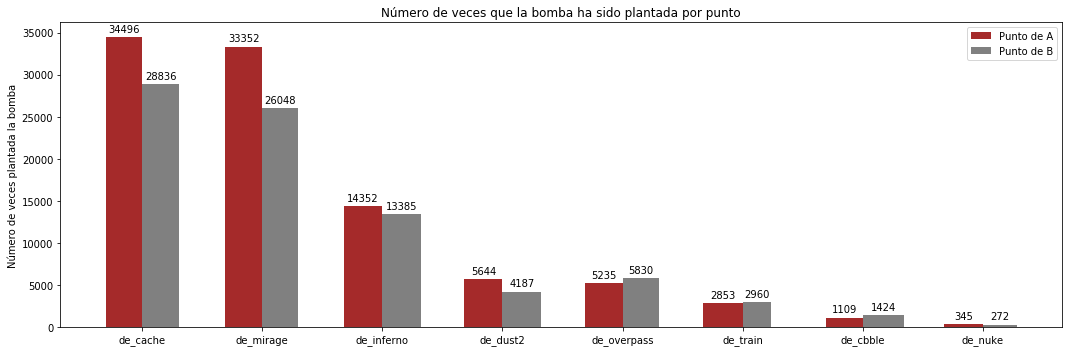

In [73]:
labels = data['map']
terror_means = data['Veces plantadas en B']
ct_means = data['Veces plantadas en A']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots()
rects1 = ax.bar(x - data['% Victoria A']/500, ct_means, data['% Victoria A']/250, label='Punto de A', color= 'brown')
rects2 = ax.bar(x + data['% Victoria B']/500, terror_means, data['% Victoria B']/250, label='Punto de B', color= 'grey')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Número de veces plantada la bomba')
ax.set_title('Número de veces que la bomba ha sido plantada por punto')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()